In [1]:
### import modules
from utils import plot_comparison

# Comparing With and Without Waning

Let us now compare the results from running the modified SEIR model with and without waning protection of the vaccines. We compared the difference percentage reduction that was calculated 60 days after vaccination started, and the plots are shown below. 

## 50% efficacy
### Measured 30 Days After Vaccination

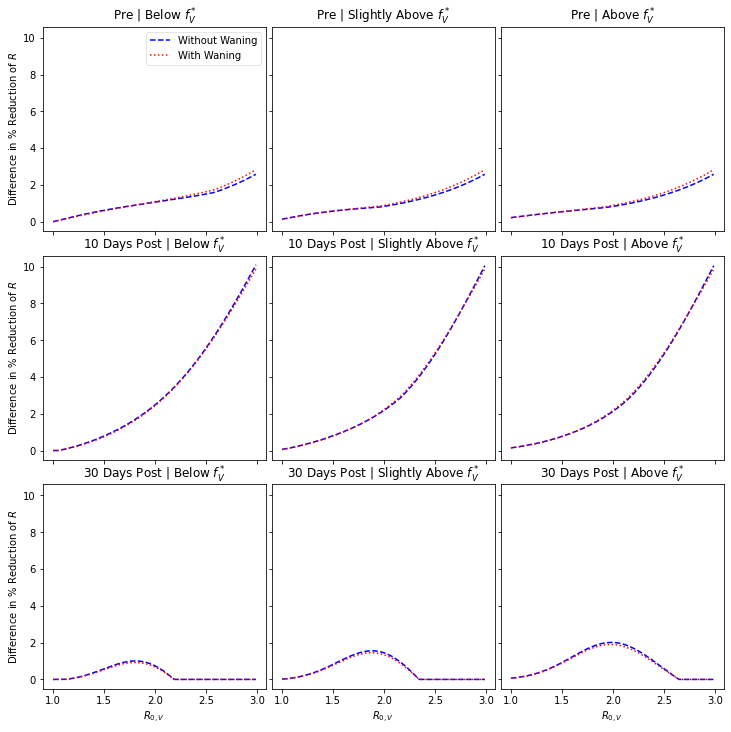

In [2]:
%store -r pre_df_30
%store -r post10_df_30
%store -r post30_df_30

%store -r pre_df_30_waning
%store -r post10_df_30_waning
%store -r post30_df_30_waning

fig_30 = plot_comparison(pre_df_30, post10_df_30, post30_df_30, pre_df_30_waning, post10_df_30_waning, post30_df_30_waning, 0.5)

### Measured 60 Days After Vaccination

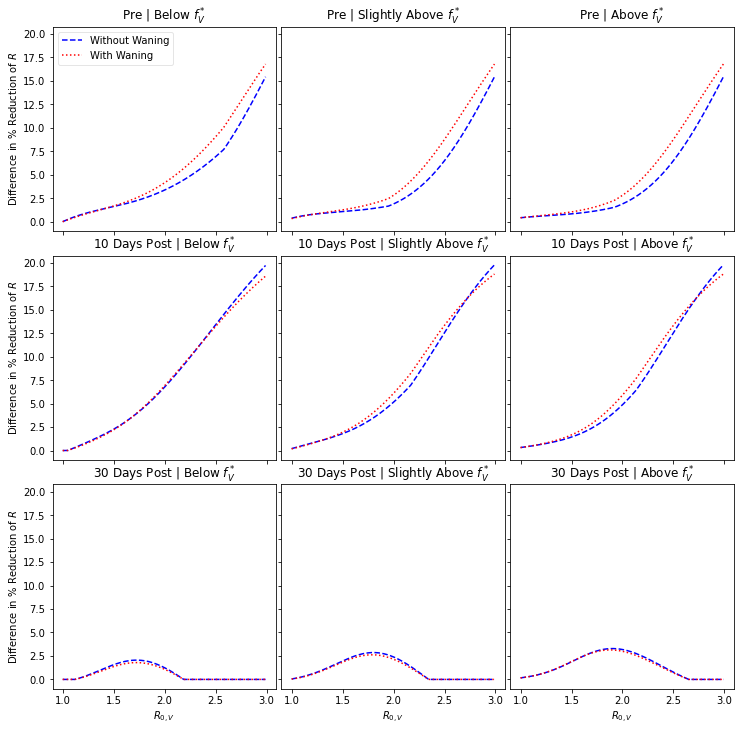

In [3]:
%store -r pre_df_60
%store -r post10_df_60
%store -r post30_df_60

%store -r pre_df_60_waning
%store -r post10_df_60_waning
%store -r post30_df_60_waning

fig_60 = plot_comparison(pre_df_60, post10_df_60, post30_df_60, pre_df_60_waning, post10_df_60_waning, post30_df_60_waning, 0.5)

### Measured 100 Days After Vaccination

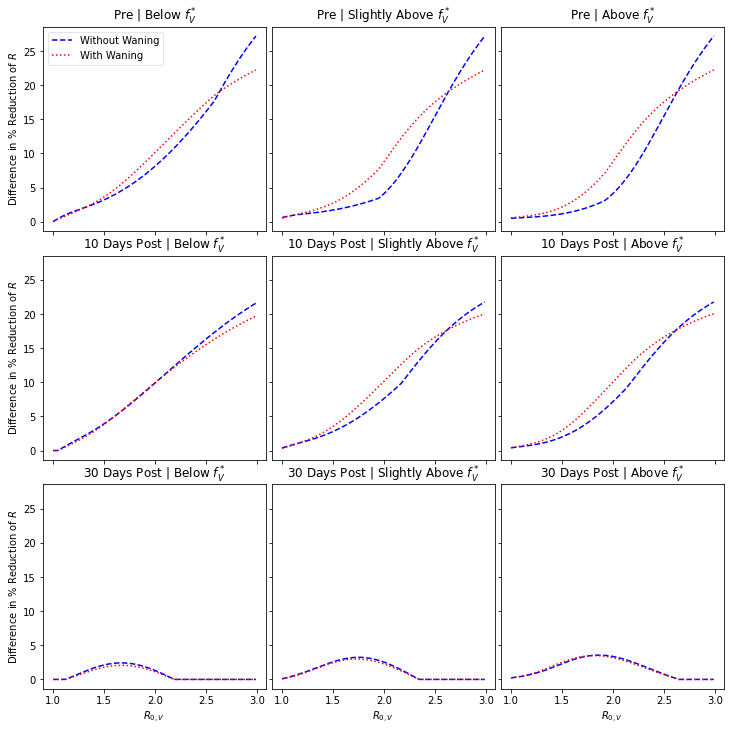

In [4]:
%store -r pre_df_100
%store -r post10_df_100
%store -r post30_df_100

%store -r pre_df_100_waning
%store -r post10_df_100_waning
%store -r post30_df_100_waning

fig_100 = plot_comparison(pre_df_100, post10_df_100, post30_df_100, pre_df_100_waning, post10_df_100_waning, post30_df_100_waning, 0.5)

### Measured 300 Days After Vaccination (End of Pandemic)

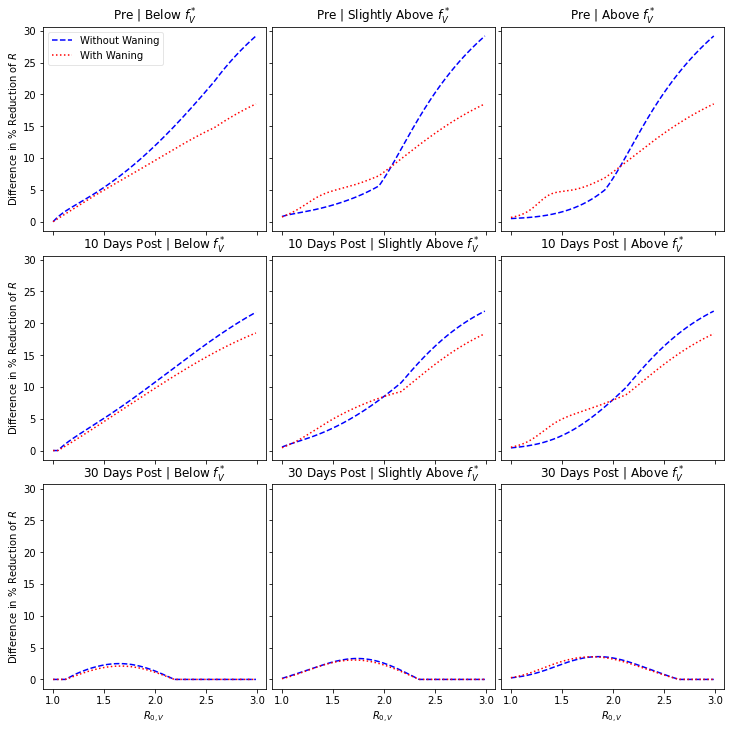

In [5]:
%store -r pre_df_300
%store -r post10_df_300
%store -r post30_df_300

%store -r pre_df_300_waning
%store -r post10_df_300_waning
%store -r post30_df_300_waning

fig_300 = plot_comparison(pre_df_300, post10_df_300, post30_df_300, pre_df_300_waning, post10_df_300_waning, post30_df_300_waning, 0.5)

## 80% Vaccine Efficacy
### Measured 30 Days After Vaccination

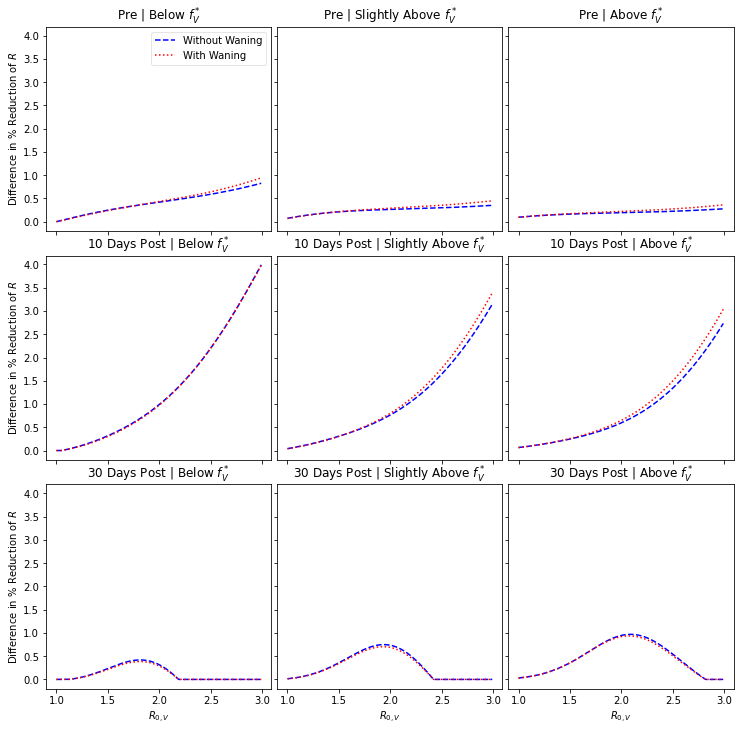

In [6]:
%store -r pre_df_30
%store -r post10_df_30
%store -r post30_df_30

%store -r pre_df_30_waning
%store -r post10_df_30_waning
%store -r post30_df_30_waning

fig_30 = plot_comparison(pre_df_30, post10_df_30, post30_df_30, pre_df_30_waning, post10_df_30_waning, post30_df_30_waning, 0.8)

### Measured 60 Days After Vaccination

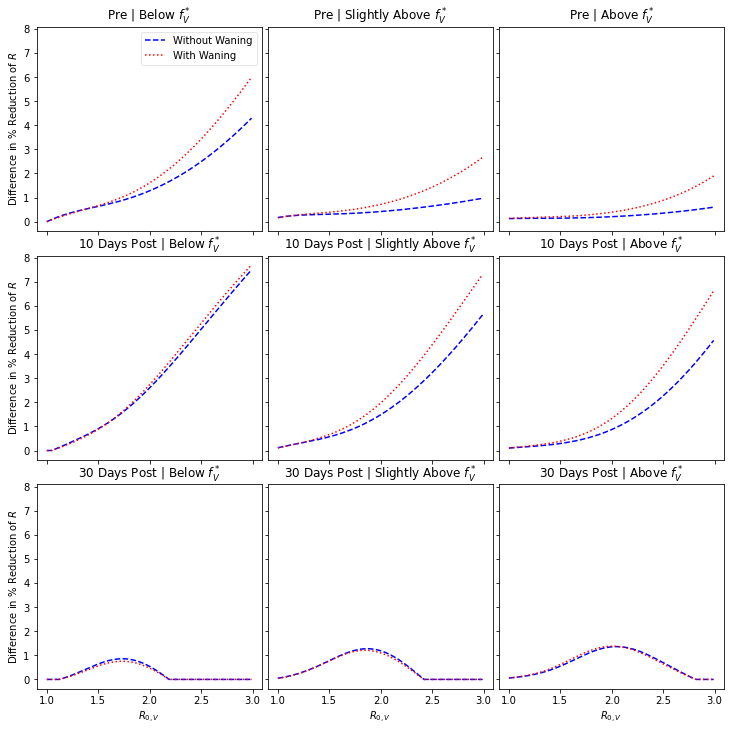

In [7]:
%store -r pre_df_60
%store -r post10_df_60
%store -r post30_df_60

%store -r pre_df_60_waning
%store -r post10_df_60_waning
%store -r post30_df_60_waning

fig_60 = plot_comparison(pre_df_60, post10_df_60, post30_df_60, pre_df_60_waning, post10_df_60_waning, post30_df_60_waning, 0.8)

### Measured 100 Days After Vaccination

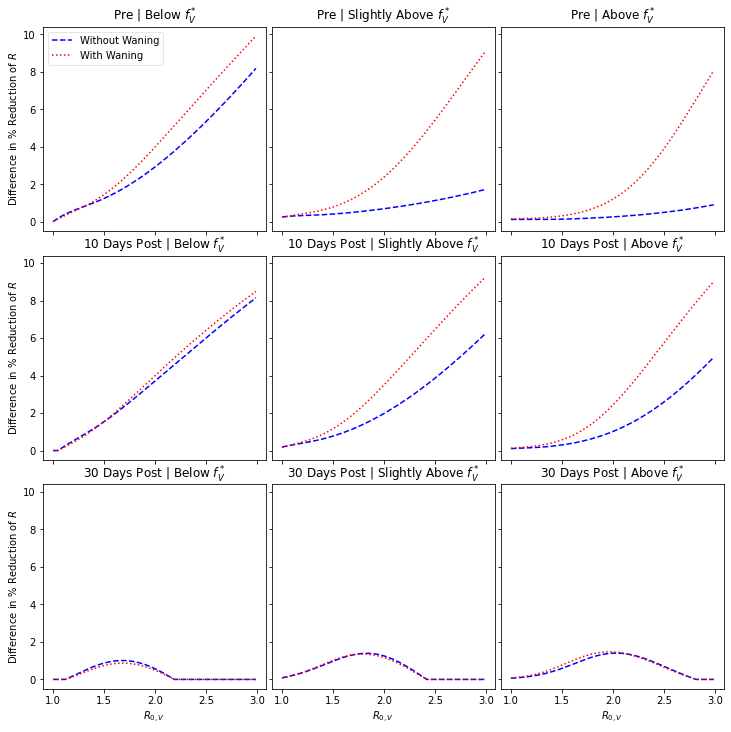

In [8]:
%store -r pre_df_100
%store -r post10_df_100
%store -r post30_df_100

%store -r pre_df_100_waning
%store -r post10_df_100_waning
%store -r post30_df_100_waning

fig_100 = plot_comparison(pre_df_100, post10_df_100, post30_df_100, pre_df_100_waning, post10_df_100_waning, post30_df_100_waning, 0.8)

### Measured 300 Days After Vaccination (End of Pandemic)

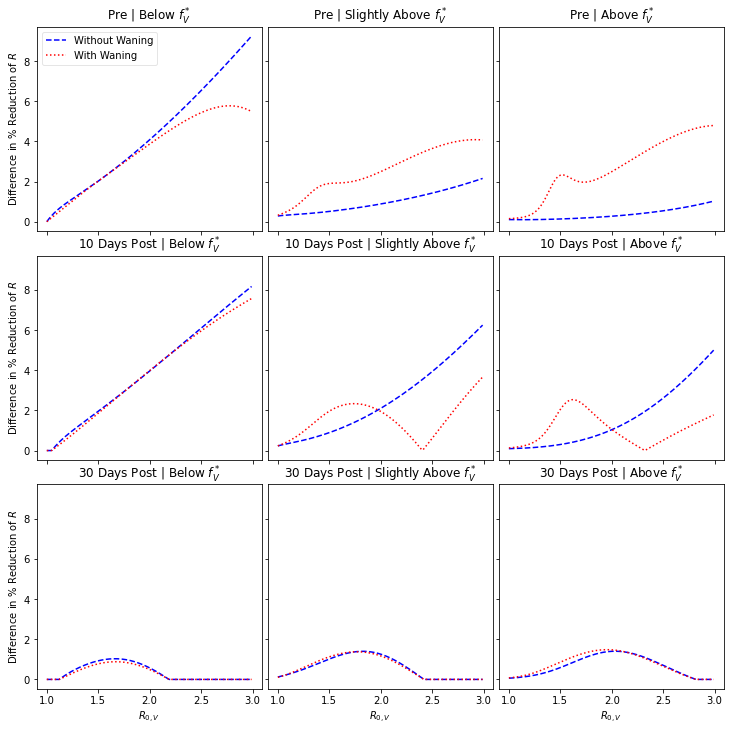

In [9]:
%store -r pre_df_300
%store -r post10_df_300
%store -r post30_df_300

%store -r pre_df_300_waning
%store -r post10_df_300_waning
%store -r post30_df_300_waning

fig_300 = plot_comparison(pre_df_300, post10_df_300, post30_df_300, pre_df_300_waning, post10_df_300_waning, post30_df_300_waning, 0.8)